# Assignment 1

### Table of contents

    Importing libraries
    Particle class
    Collision class
    Model 
    Task 1
    Task 2 
    Task 3 
    Task 4

In [1]:
from system_class import*
from particle_classes import*
from matplotlib.patches import Rectangle
from scipy import optimize
from helper import *

##### Initial Conditions

Since the Boltzmann distribution assumes an ideal gass, the simulations in this project will make the same assumptions. Therefor the ideal gass law is used in the calculations.

In [2]:
k_b = 1.38 * 10**(-23)       #Boltzmanns constant
R = 8.3144626181532


**Van Der Waals Gass equation for hard spheres**


a = 0                          #This is the attraction constant used in Wan Der waals equation for hard sphere gass. It is zero since we are not taking into account the molecular attraction 


**Finding the neccecary constants in order to be able to compare**

In [3]:
#The Gass is a Van der Waals gass
b = 0.03186                    #This is the volume one mole of oxygen atoms take up, https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)

mean_velocity = 461.3          #Mean velocity of oxygen at zero Kelvin, [m/s] https://www.thoughtco.com/root-squmean-velocity-example-problem-607556
mu = 1.66 * 10**(-27)          #Atomic weight [kg]
m_O2 =2*16*mu                  #Weight of O2 [kg]


#Calculating the temperature used in the boltzmann distribution so that it follows the equipartition theorem in two dimensions.

T = mean_velocity**2 * m_O2/2/k_b   #The temperatur set for this simulation [Kelvin]



P = 101325                     #The pressure set for this experiment [pascal]
r_02 = 152*10**(-12)           #Radius of an oxygen atom [meters]
mol =  6.0221415 * 10**(23)    #1 mol

**Functions**


In [4]:
def Van(n): 
    return  n*b + n*R*T/P 

**Task 1**

In the cell below a system with 4000 particles with equal mass and mean velocities is set up. The system is then set to evolve over 10000 timesteps. And then finally the speed distribution of the gas is analysed. 

In [ ]:
# Initial Conditions
num_particles =3000
n = num_particles/mol      #Number of moles
V = Van(n)                        #Volume of the box as calculated from Van der Waals
x_b = y_b = V**(1/3)           #Box boundaries given in meters
elasticity = 1
tc = 0
mass = [m_O2]
radius = [r_02]


In [ ]:
system_1 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)     # Initializing the system
system_1.uniform_particles()                                                            # Putting the particles in the box with a uniform distribution
system_1.find_collisions()           


In [ ]:
vel_start = system_1.return_velocities()
for time in range(1000):
    times = 20
    system_1.update(times)
    system_1.convergence()
vel_end = system_1.return_velocities()

**Making a convergence plot**

In [ ]:
fig, ax = plt.subplots()
ax.plot(system_1.list_of_differences)

In the three histograms below we see the initial speed distribution, the speed distribution after the system has reached equilibrium and the D Maxwell-Boltzmann distribution.

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5), sharex = True)

ax1.hist(vel_start[0],1, label = "vel_start" , density = True, histtype = 'step')
ax1.legend()
ax1.set_xlabel("Velocity [m/s]")
ax1.set_ylabel("Probability")

v = np.linspace(0,mean_velocity*3,100)
N = sum(boltsmann(v, m_O2)*(v[1]-v[0]))                     #Normalisation constant for the Boltzmann distribution

ax2.hist(vel_end,1000, label = "vel_end" , density = True, histtype = 'step')  #1000 is the number of bins we want to plot for 
ax2.plot(v,boltsmann(v, m_O2)/N, label = "Boltzmann" )
ax2.set_xlabel("Velocity [m/s]")
ax2.set_ylabel("Probability")
ax2.legend()


fig.suptitle( "Comparing the velocity distributions")
plt.show()

**Task 2** 

In the cell below a system with 4000 particles with equal mass and mean velocities is set up. The system is then set to evolve over 10000 timesteps. And then finally the speed distribution of the gas is analysed. 

In [ ]:
# Initial Conditions
num_particles =2000
n = num_particles/mol      #Number of moles
V = Van(n)                        #Volume of the box as calculated from Van der Waals
x_b = y_b = V**(1/3)           #Box boundaries given in meters
elasticity = 1
tc = 0
mass = [m_O2, 4*m_O2]
radius = [r_02]

system_2 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)     # Initializing the system
system_2.uniform_particles()                                                            # Putting the particles in the box with a uniform distribution
system_2.find_collisions()  


In [ ]:
vel_start = system_2.return_velocities()
for time in range(100):
    times = 60
    system_2.update(times)
    system_2.convergence()
    print(time, end=" ")
vel_end = system_2.return_velocities()

**Printing the convergence**

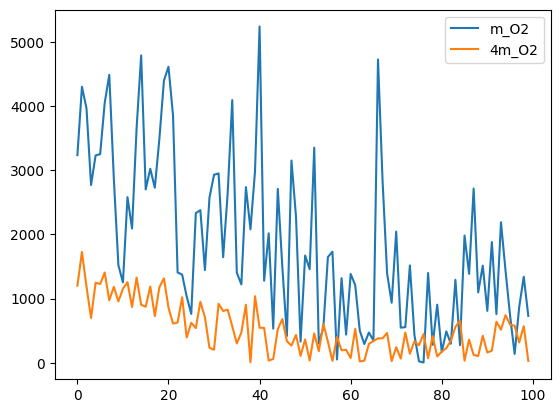

In [41]:
convergence = np.array(system_2.list_of_differences)
convergence_m_O2 = convergence[:,0]
convergence_4m_O2 = convergence[:,1]

fig, ax = plt.subplots()
ax.plot(convergence_m_O2, label = "m_O2")
ax.plot(convergence_4m_O2, label = "4m_O2")
plt.legend()

**Velocity distribution of the particles with mass equal to m02 and 4mO2.**

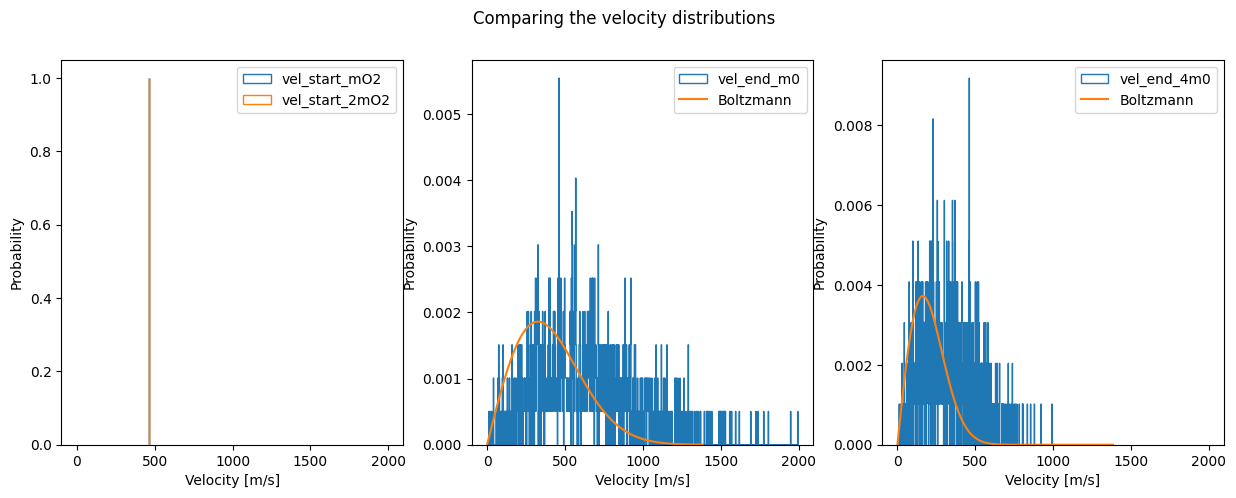

In [40]:
vel_start_m0 = vel_start[:int(system_2.num_particles/2)]
vel_start_4m0 = vel_start[int(system_2.num_particles/2):]

vel_end_m0 = vel_end[:int(system_2.num_particles/2)]
vel_end_4m0 = vel_end[int(system_2.num_particles/2):]

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5), sharex = True)

ax1.hist(vel_start_m0[0],1, label = "vel_start_mO2" , density = True, histtype = 'step')
ax1.hist(vel_start_4m0[0],1, label = "vel_start_2mO2" , density = True, histtype = 'step')
ax1.legend()
ax1.set_xlabel("Velocity [m/s]")
ax1.set_ylabel("Probability")


v = np.linspace(0,mean_velocity*3,100)
N = sum(boltsmann(v, m_O2)*(v[1]-v[0]))                     #Normalisation constant for the Boltzmann distribution

ax2.hist(vel_end_m0,1000, label = "vel_end_m0" , density = True, histtype = 'step')  #1000 is the number of bins we want to plot for 
ax2.plot(v,boltsmann(v, m_O2)/N, label = "Boltzmann" )
ax2.set_xlabel("Velocity [m/s]")
ax2.set_ylabel("Probability")
ax2.legend()

v = np.linspace(0,mean_velocity*3,100)
N = sum(boltsmann(v, 4*m_O2)*(v[1]-v[0]))                     #Normalisation constant for the Boltzmann distribution

ax3.hist(vel_end_4m0,1000, label = "vel_end_4m0" , density = True, histtype = 'step')  #1000 is the number of bins we want to plot for 
ax3.plot(v,boltsmann(v, 4* m_O2)/N, label = "Boltzmann" )
ax3.set_xlabel("Velocity [m/s]")
ax3.set_ylabel("Probability")
ax3.legend()


fig.suptitle( "Comparing the velocity distributions")
plt.show()

**Task 3**



In [19]:
# Initial Conditions
num_particles =3000
n = num_particles/mol      #Number of moles
V = Van(n)                        #Volume of the box as calculated from Van der Waals
x_b = y_b = V**(1/3)           #Box boundaries given in meters
mass = [m_O2, 4*m_O2]
radius = [r_02]

**Elasticity = 1**

In [20]:
elasticity=1
system_e_1 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc= 0)     # Initializing the system
system_e_1.uniform_particles()                                                               # Putting the particles in the box with a uniform distribution
system_e_1.find_collisions()  
avg_mO2_e_1, avg_4mO2_e_1, avg_all_e_1 = system_e_1.calculating_the_energy(number_of_updates= 4000, m_O2 = m_O2 ,average_max = 0.001, stopping_condition = 10)

**Elasticity = 0.9**

In [21]:
elasticity=0.9
system_e_09 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc= 0)     # Initializing the system
system_e_09.uniform_particles()                                                               # Putting the particles in the box with a uniform distribution
system_e_09.find_collisions()  
avg_mO2_e_09, avg_4mO2_e_09, avg_all_e_09 = system_e_09.calculating_the_energy(number_of_updates= 4000, m_O2 = m_O2 ,average_max = 0.001, stopping_condition = 10)

**Elasticity = 0.8**

In [22]:
elasticity=0.8
system_e_08 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc= 0)     # Initializing the system
system_e_08.uniform_particles()                                                               # Putting the particles in the box with a uniform distribution
system_e_08.find_collisions()  
avg_mO2_e_08, avg_4mO2_e_08, avg_all_e_08 = system_e_08.calculating_the_energy(number_of_updates= 4000, m_O2 = m_O2 ,average_max = 0.001, stopping_condition = 10)

**Ploting the results**

Text(0.5, 0.98, 'Energy for systems with different elasticities')

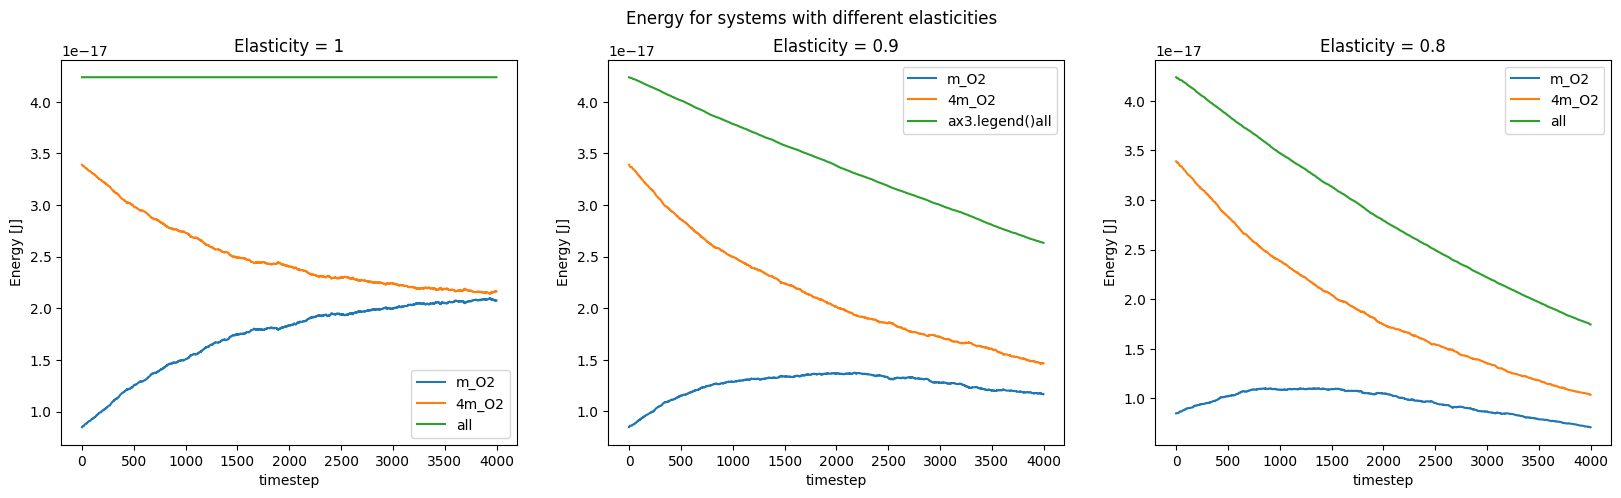

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,5))

ax1.set_title("Elasticity = 1")
ax1.plot(avg_mO2_e_1, label = "m_O2")
ax1.plot(avg_4mO2_e_1, label = "4m_O2")
ax1.plot(avg_all_e_1, label = "all")
ax1.set_xlabel("timestep")
ax1.set_ylabel("Energy [J]")
ax1.legend()

ax2.set_title("Elasticity = 0.9")
ax2.plot(avg_mO2_e_09, label = "m_O2")
ax2.plot(avg_4mO2_e_09, label = "4m_O2")
ax2.plot(avg_all_e_09, label = "ax3.legend()all")
ax2.set_xlabel("timestep")
ax2.set_ylabel("Energy [J]")
ax2.legend()

ax3.set_title("Elasticity = 0.8")
ax3.plot(avg_mO2_e_08, label = "m_O2")
ax3.plot(avg_4mO2_e_08, label = "4m_O2")
ax3.plot(avg_all_e_08, label = "all")
ax3.set_xlabel("timestep")
ax3.set_ylabel("Energy [J]")
ax3.legend()

fig.suptitle("Energy for systems with different elasticities")






Task 4: Crater formation

**Initial conditions**

In [4]:
elasticity= 0.5
x_boundaries = 1
y_boundaries = 0.5
mean_velocity = 0 #m/s
mu = 1
mass=[1]
radius=[.005]
num_particles = int((x_boundaries * y_boundaries)/2/np.pi/ radius[0]**2)
tc = 0

In [5]:
def crater(sys, times):
    x_list = []
    y_list = []

    #adding the starting positions
    x = []
    y = []
    for p in sys.particles:  
        x.append(p.position.x)
        y.append(p.position.y)
        
    x_list.append(x)
    y_list.append(y)

    times = 100
    while sys.energy()/energy_start >0.1:
        print(sys.energy()/energy_start, end = " ")
        sys.update(times)

    #adding the ending positions
    x = []
    y = []
    for p in sys.particles:  
        x.append(p.position.x)
        y.append(p.position.y)
    x_list.append(x)
    y_list.append(y)
    return x_list, y_list


In [6]:
def plotting(x_list, y_list):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Particle evolution')

    r_list = []
    for p in system_4.particles: 
        r_list.append(p.radius)
    r_list = np.array(r_list)

    c_list = []
    for i in range(len(r_list)-1):
        c_list.append("blue")
    c_list.append("red")


    ax1.scatter(x_list[0], y_list[0], s =r_list , color = c_list)
    ax1.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))

    ax2.scatter(x_list[1], y_list[1],s =r_list, color = c_list)
    ax2.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))
    return fig


In [7]:
def size(x_list, y_list):
    x = np.array(x_list)
    y = np.array(y_list)
    return (abs(x[1,:] - x[0,:]) + abs(y[1,:] - y[0,:])).sum()


**We are scanning over the following parameters**

In [8]:
mass_parameters = np.array([0.1,1,10,25,50]) #change this back to 0.1
speed_parameters = np.array([0.1,1,10,100,1000])*-1
radius_parameters = np.array([0.1, 1,5, 10,15])
elasticity_parameters = np.array([0.6,0.5,0.3,0.2, 0.1])

**Mass parameter scann**

In [9]:
size_mass = []
for proportion in mass_parameters:
    print("")
    print(f"Scanning for proportion {proportion}")
    sys = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
    sys.uniform_particles()
    projectile = particle(position(0.5,0.75), velocity(0, -5), 5*radius[0],proportion* mass[0])
    sys.particles.append(projectile)
    sys.find_collision_projectile()                  #Denne tar litt tid:) 
    energy_start = sys.energy()
    times = 100
    x_list, y_list = crater(sys, times)
    s = size(x_list, y_list)
    size_mass.append(s)


Scanning for proportion 0.1
1.0 0.11010653975665279 
Scanning for proportion 1.0
1.0 
Scanning for proportion 10.0
1.0 0.40540617124286665 0.284427363540758 0.2280484444945596 0.19832343475858163 0.18147190221389675 0.16701428286907624 0.15847666295489915 0.1482549227334984 0.13949045868817664 0.13290916654955526 0.1267120787838507 0.12030516128518556 0.11659390192919575 0.11351543828669065 0.11011851195370939 0.10682118910635738 0.10392011060434247 0.10102376549918465 
Scanning for proportion 25.0
1.0 0.6411719601878465 0.5344856816121276 0.47554757851028434 0.423663770213955 0.390055890847422 0.3575927671157042 0.3365636194952407 0.31685935961409367 0.29799067232523 0.28693902034496593 0.27648925797917584 0.2678372083211422 0.2602707616971972 0.25098005673123236 0.2434033137369579 0.23158589038877836 0.22596648055059926 0.2175135827300206 0.21109793667438234 0.20483016841825147 0.1986962130391369 0.19312821404783787 0.18764259944562242 0.1825566628020924 0.1791097803059964 0.1761598

In [ ]:
plt.plot(mass_parameters, size_mass)

**Speed parameters scann**

In [ ]:
size_speed = []
for vel in speed_parameters:
    print("")
    print(f"Scanning for proportion {proportion}")
    sys = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
    sys.uniform_particleRadiuss()

    projectile = particle(position(0.5,0.75), velocity(0, vel), 5*radius[0],25* mass[0])
    sys.particles.append(projectile)
    sys.find_collision_projectile()         
    
    energy_start = sys.energy()
    times = 100
    x_list, y_list = crater(sys, times)
    s = size(x_list, y_list)
    size_speed.append(s)

In [ ]:
plt.plot(speed_parameters, size_speed)

**Radius parameters scann**

In [ ]:
size_radius = []
for r in radius_parameters:
    print("")
    print(f"Scanning for proportion {proportion}")
    sys = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
    sys.uniform_particles()

    projectile = particle(position(0.5,0.75), velocity(0, -5), r*radius[0],25* mass[0])
    sys.particles.append(projectile)
    sys.find_collision_projectile()
    
    energy_start = sys.energy()
    times = 100
    x_list, y_list = crater(sys, times)
    s = size(x_list, y_list)
    size_radius.append(s)

In [ ]:
plt.plot(radius_parameters, size_radius)

**Elasticity parameters scann**

In [ ]:
size_elasticity = []
for e in elasticity_parameters:
    print("")
    print(f"Scanning for proportion {proportion}")
    sys = system(num_particles, e,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
    sys.uniform_particles()

    projectile = particle(position(0.5,0.75), velocity(0, -5), 5*radius[0],25* mass[0])
    sys.particles.append(projectile)
    sys.find_collision_projectile()
    
    energy_start = sys.energy()
    times = 100
    x_list, y_list = crater(sys, times)
    s = size(x_list, y_list)
    size_elasticity.append(s)

In [ ]:
plt.plot(elasticity_parameters, size_elasticity)

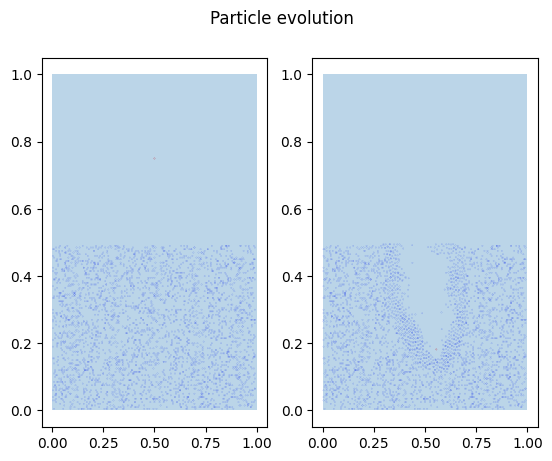

In [38]:
fig = plotting(x_list, y_list)
plt.show()